In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 

In [115]:
train = pd.read_csv(r"C:\Users\c1224\Downloads\titanic\train.csv")
test = pd.read_csv(r"C:\Users\c1224\Downloads\titanic\test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [117]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [118]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: ylabel='count'>

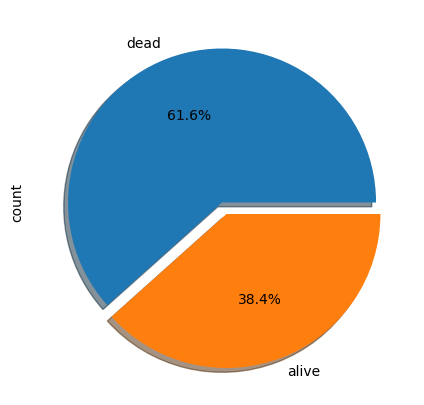

In [119]:
# 생존비율 확인
train["Survived"].value_counts()

plt.figure(figsize=(8, 5))
labels = ['dead', 'alive']
train['Survived'].value_counts().plot.pie(explode=[0, 0.08], 
                                          shadow=True,
                                          autopct='%1.1f%%',
                                          labels=labels)

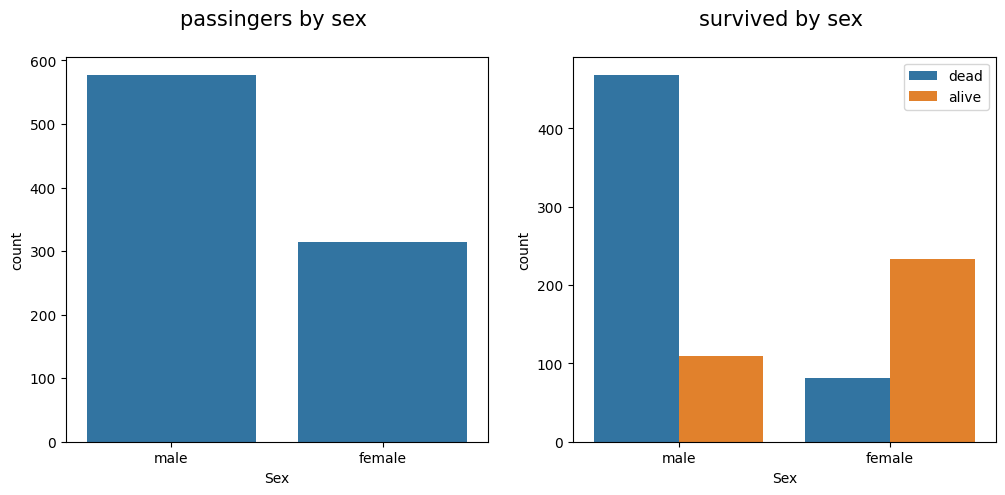

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("passingers by sex \n", size=15)
sns.countplot(x="Sex", data=train, ax=axes[0])

axes[1].set_title("survived by sex \n", size=15)
sns.countplot(x="Sex", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['dead', 'alive'])

,Survived
Sex,
female,0.742038
male,0.188908


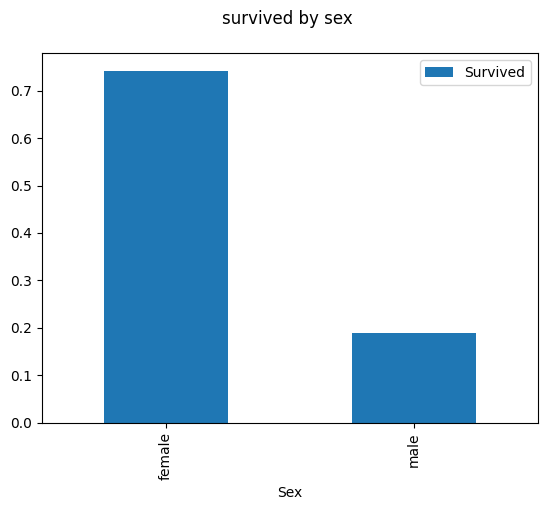

In [121]:
# 성별 생존률
sur = train[['Sex', 'Survived']].groupby('Sex').mean().plot.bar()
sur.set_title("survived by sex \n")
train[['Sex', 'Survived']].groupby('Sex').mean()

## 2-3 티켓클래스

In [122]:
# 티켓 클래스 별로 어떤 생존률을 보이는가
train[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


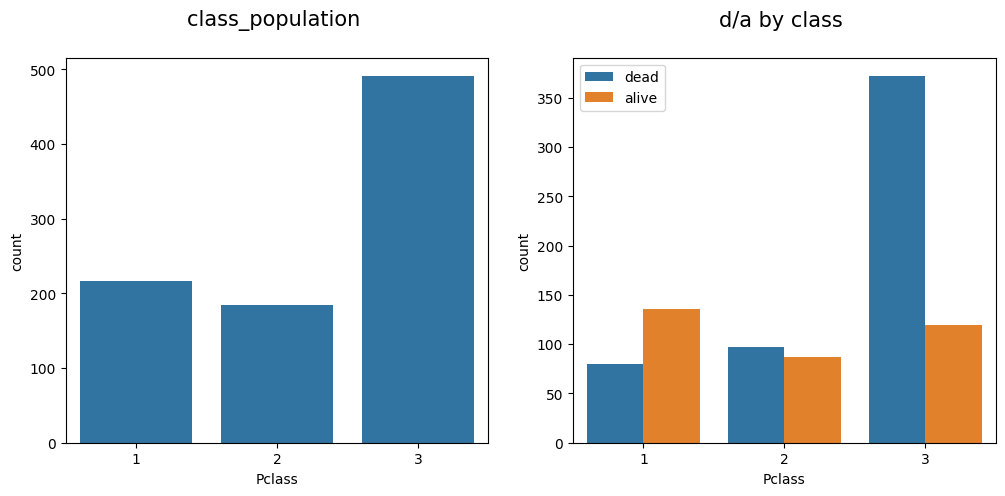

In [123]:
fig, axes = plt.subplots(1,2,figsize=(12,5)) # 하나의 그림이 fig, 두 개의 그래프가 axes
axes[0].set_title("class_population \n", size=15)
sns.countplot(data = train, x = 'Pclass', ax = axes[0])

axes[1].set_title("d/a by class \n", size=15)
sns.countplot(x = "Pclass", hue = "Survived", data = train, ax =axes[1])
axes[1].legend(labels = ['dead', 'alive'])

Text(0.5, 1.0, 'survived by Pclass')

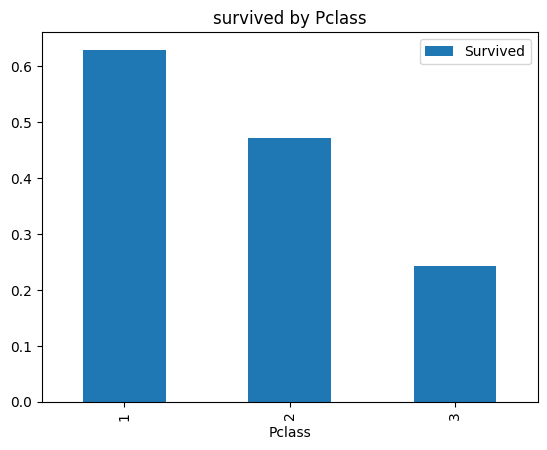

In [124]:
# class별 생존률
sur = train[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()
sur.set_title('survived by Pclass')

## 2-4 나이

In [125]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

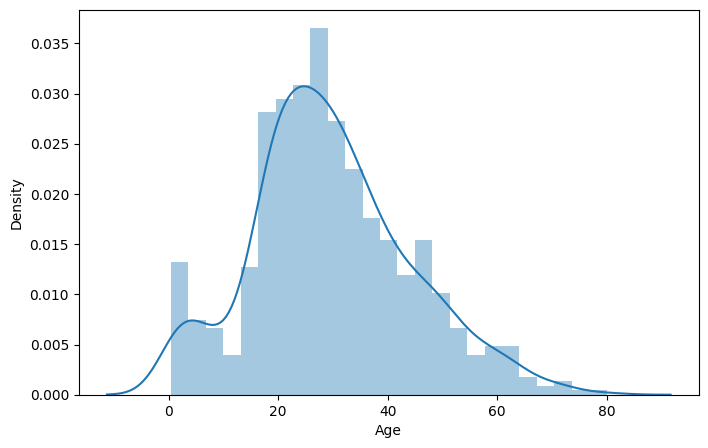

In [126]:
plt.figure(figsize=(8, 5))
sns.distplot(train['Age'], bins=25)

<Axes: xlabel='Age', ylabel='Density'>

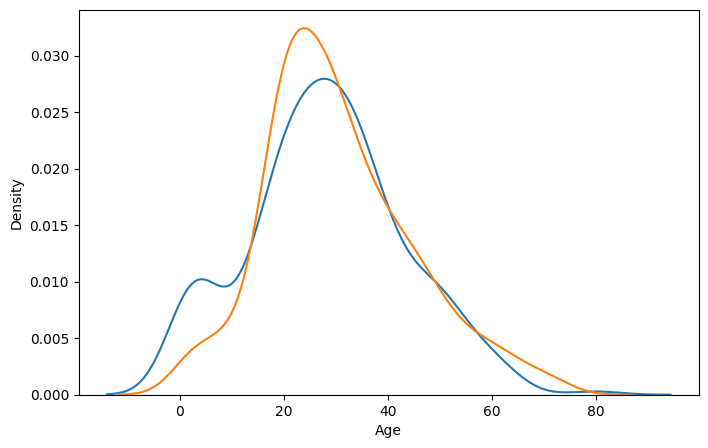

In [127]:
sur = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

plt.figure(figsize=(8, 5))
sns.distplot(sur['Age'], bins=25, hist=False, label='Survived')
sns.distplot(dead['Age'], bins=25, hist=False, label='Dead')
# plt.legend()

## 2-5 함께 탑승한 가족의 수

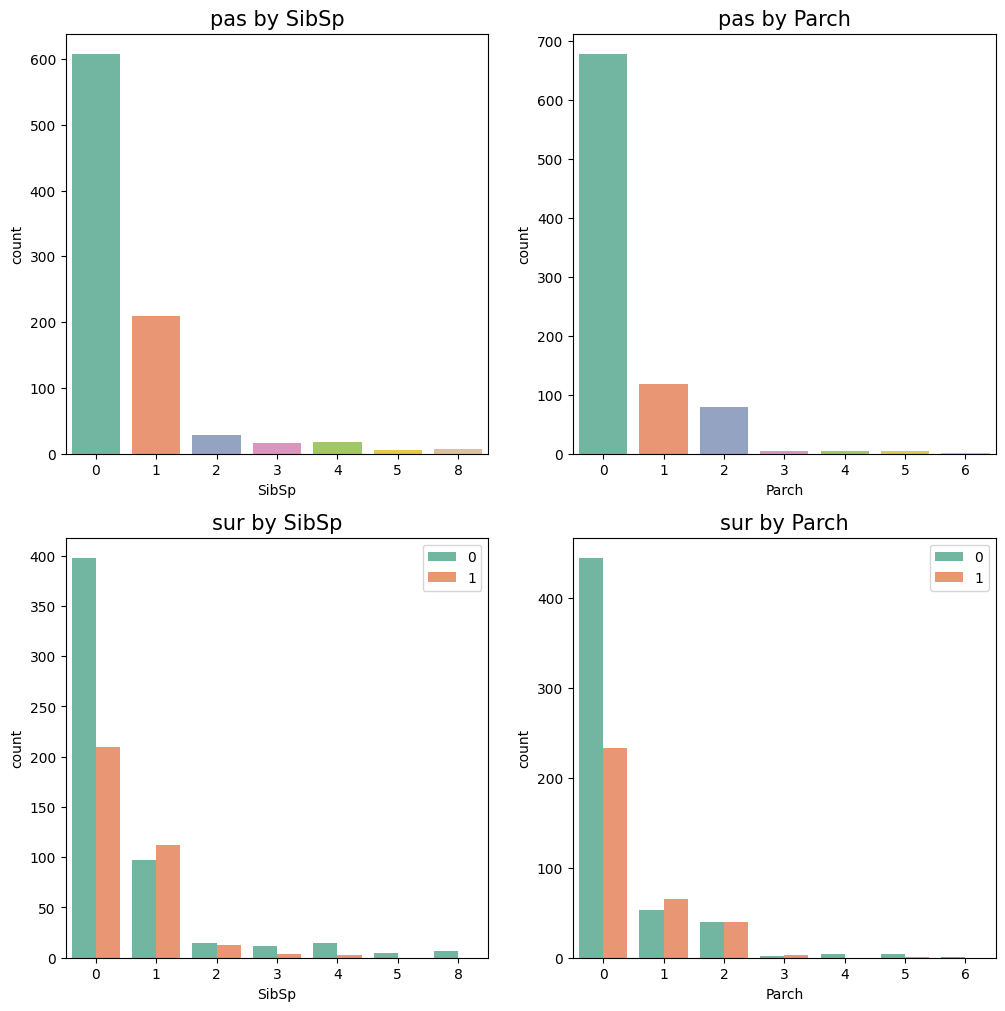

In [128]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))

axes[0][0].set_title("pas by SibSp", size = 15)
sns.countplot(x='SibSp', data = train, ax = axes[0][0], palette="Set2")
axes[0][1].set_title("pas by Parch", size = 15)
sns.countplot(x="Parch", data=train, ax=axes[0][1], palette="Set2")
axes[1][0].set_title("sur by SibSp", size=15)
sns.countplot(x="SibSp", hue="Survived", data=train, ax=axes[1][0], palette="Set2")
axes[1][0].legend(loc='upper right')
axes[1][1].set_title("sur by Parch", size=15)
sns.countplot(x="Parch", hue="Survived", data=train, ax=axes[1][1], palette="Set2")
axes[1][1].legend(loc='upper right')

In [129]:
print(train[['SibSp', 'Survived']].groupby(['SibSp']).mean())
print(train[['Parch', 'Survived']].groupby(['Parch']).mean())

       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


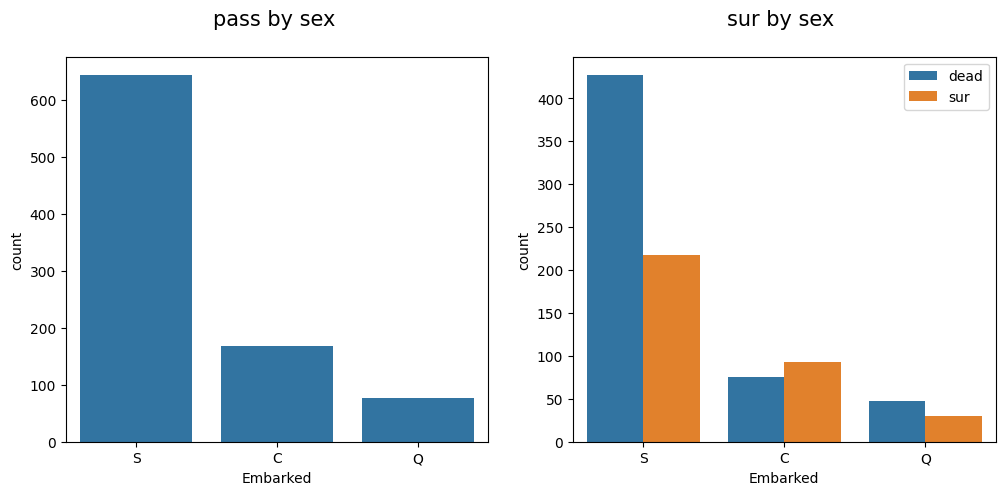

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("pass by sex \n", size=15)
sns.countplot(x="Embarked", data=train, ax=axes[0])

axes[1].set_title("sur by sex \n", size=15)
sns.countplot(x="Embarked", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['dead', 'sur'])

<Axes: >

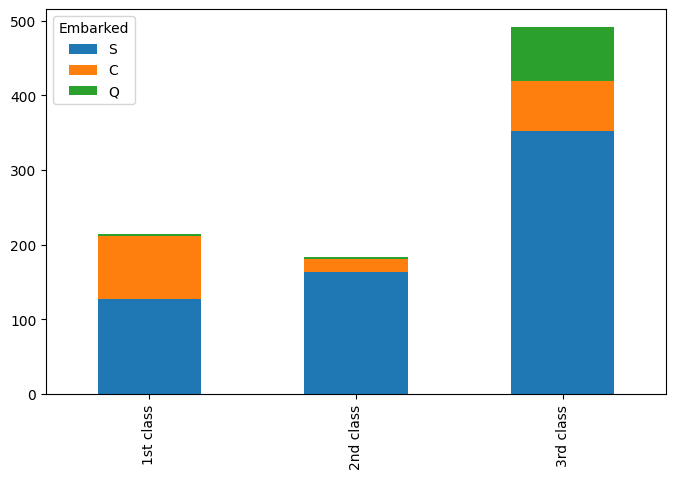

In [131]:
pc1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
pc2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
pc3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ['1st class', '2nd class', '3rd class']

fig, ax = plt.subplots(figsize=(8, 5))
pc.plot(kind='bar', stacked=True, ax=ax)

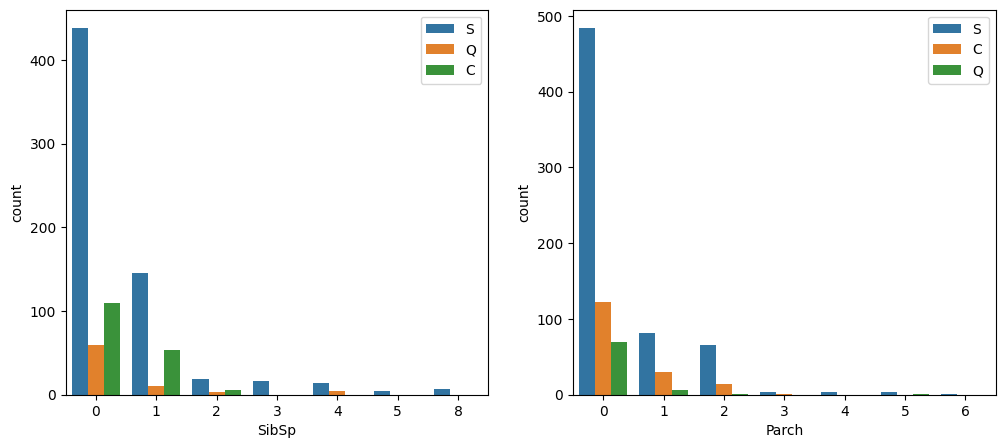

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=train, x='SibSp', hue='Embarked', ax=ax[0])
sns.countplot(data=train, x='Parch', hue='Embarked', ax=ax[1])
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.show()

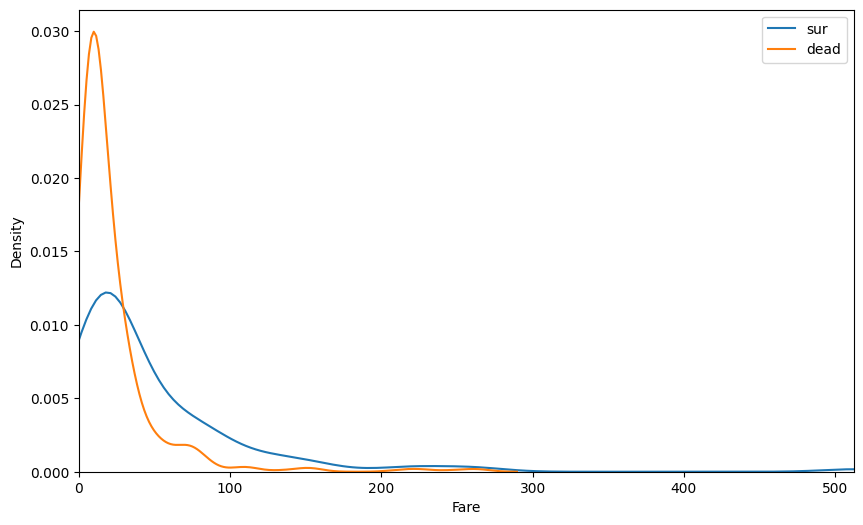

In [133]:
fig, ax = plt.subplots(figsize=(10,6))

#분포 확인
sns.kdeplot(train[train['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train[train["Survived"]==0]['Fare'], ax=ax)

#축 범위
ax.set(xlim=(0, train['Fare'].max()))
ax.legend(['sur','dead'])

---

# 전처리

In [134]:
# 한번에 변환하기 위해 리스트로 담아놓음
data_list = [train, test]

In [135]:
# int type의 숫자 0과 1로 매핑
for data in data_list:
    data['Sex'] = data['Sex'].astype('category').cat.codes
    
train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int8

In [136]:
# 나이에 결측치 존재
# 결측치에 남자는 남자 나이의 평균, 여자는 여자 나이의 평균을 넣어줄 예정
sex_mean = train.groupby('Sex')['Age'].mean()
sex_mean

Sex
0    27.915709
1    30.726645
Name: Age, dtype: float64

In [137]:
#성별 숫자로 바꾸기
for data in data_list:
    data.loc[(data['Sex'] == 0) & (data['Age'].isnull()), 'Age'] = sex_mean[0]
    data.loc[(data['Sex'] == 1) & (data['Age'].isnull()), 'Age'] = sex_mean[1]
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
# 나이 섹션 나누기
train['AgeRange'] = pd.cut(train['Age'], 5)
train[['AgeRange', 'Survived']].groupby(['AgeRange']).mean()

,Survived
AgeRange,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.344168
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [139]:
# 나이 섹션 나누기
for data in data_list:
    data.loc[data['Age']<=16, 'Age'] = 0
    data.loc[(data['Age']>16) & (data['Age']<=32), 'Age'] = 1
    data.loc[(data['Age']>32) & (data['Age']<=48), 'Age'] = 2
    data.loc[(data['Age']>48) & (data['Age']<=64), 'Age'] = 3
    data.loc[data['Age']>64, 'Age'] = 4
train.drop('AgeRange', inplace=True, axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,NaN,S


In [140]:
# 호칭 나누기
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand = False)
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [141]:
for data in data_list:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess',
                                        'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'], 'Other')
    # -> 범주형 -> 수치형
    data['Title_name'] = data['Title'].astype('category').cat.codes

In [142]:
train[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Other,0.444444


In [143]:
# 불필요한 데이터 지우기
train.drop(['Name', 'Title'], axis=1, inplace = True)
test.drop(['Name', 'Title'], axis=1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,0,2.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,2


1인 여행객과 가족 여행객의 생존률에 차이가 있었기 때문에 둘을 더해준다.

In [144]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,2,2
1,2,1,1,0,2.0,1,0,PC 17599,71.2833,C85,C,3,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,3,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,2,1


            Survived
FamilySize          
1           0.303538
2           0.552795
3           0.578431
4           0.724138
5           0.200000
6           0.136364
7           0.333333
8           0.000000
11          0.000000


<Axes: xlabel='FamilySize', ylabel='count'>

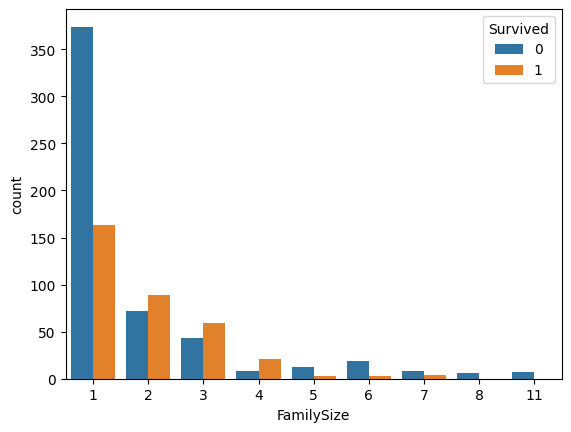

In [145]:
# 그림그려주기
print(pd.pivot_table(train, index='FamilySize', values='Survived'))
sns.countplot(data=train, x='FamilySize', hue='Survived')

In [146]:
# 컬럼 제거
drop_list = ['SibSp', 'Parch']
for data in data_list:
    data.drop(drop_list, inplace=True, axis=1)

Embarked 컬럼에 결측치는 단 2개이기 때문에 가장 많은 비율의 S로 채워준다.

In [147]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

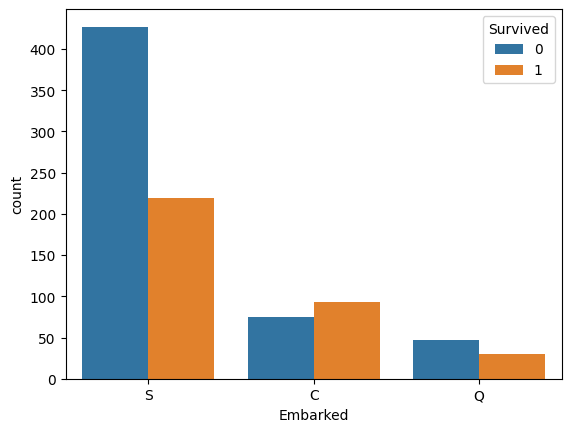

In [148]:
#결측치 처리
for data in data_list:
    data['Embarked'] = data['Embarked'].fillna('S')
sns.countplot(data=train, x = 'Embarked', hue='Survived')

In [149]:
#이제 S, C, Q를 각각 0, 1, 2로 매핑해주자
em_mapping = {'S':0, 'C':1, 'Q':2}
for data in data_list:
    data['Embarked'] = data['Embarked'].map(em_mapping)

In [150]:
train = train.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1)
test = test.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1)

In [155]:
test[test['Fare'].isnull()] = test['Fare'].mean()

In [158]:
# 잘 되었는지 확인
print(train)
print(test)

     Survived  Pclass  Sex  Age     Fare  Embarked  Title_name  FamilySize
0           0       3    1  1.0   7.2500         0           2           2
1           1       1    0  2.0  71.2833         1           3           2
2           1       3    0  1.0   7.9250         0           1           1
3           1       1    0  2.0  53.1000         0           3           2
4           0       3    1  2.0   8.0500         0           2           1
..        ...     ...  ...  ...      ...       ...         ...         ...
886         0       2    1  1.0  13.0000         0           4           1
887         1       1    0  1.0  30.0000         0           1           1
888         0       3    0  1.0  23.4500         0           1           4
889         1       1    1  1.0  30.0000         1           2           1
890         0       3    1  1.0   7.7500         2           2           1

[891 rows x 8 columns]
     Pclass  Sex  Age      Fare  Embarked  Title_name  FamilySize
0       3.

In [159]:
# 상관계수 확인, 0.1 이상이면 높은 편
train.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.043800,0.257307,0.106811,-0.052471,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.358769,-0.549500,0.045702,-0.195910,0.065997
Sex,-0.543351,0.131900,1.000000,0.070220,-0.182333,-0.116569,0.040484,-0.200988
Age,-0.043800,-0.358769,0.070220,1.000000,0.123640,-0.051334,0.427999,-0.217063
Fare,0.257307,-0.549500,-0.182333,0.123640,1.000000,0.062142,-0.009068,0.217138
Embarked,0.106811,0.045702,-0.116569,-0.051334,0.062142,1.000000,-0.081928,-0.080281
Title_name,-0.052471,-0.195910,0.040484,0.427999,-0.009068,-0.081928,1.000000,-0.207530
FamilySize,0.016639,0.065997,-0.200988,-0.217063,0.217138,-0.080281,-0.207530,1.000000


---

# 4. 모델링
여러 알고리즘을 돌려보고 점수가 가장 좋은 것을 최종 모델로 선발한다.
먼저 train_input, train_target을 만들어주고 라이브러리를 불러온다.

model: 평가할 머신러닝 모델입니다.
train_input: 모델을 훈련할 입력 데이터입니다.
train_target: 모델을 훈련할 목표 데이터(타겟)입니다.
return_train_score=True: 교차 검증에서 훈련 데이터에 대한 점수를 반환할지 여부를 지정하는 매개변수입니다. 여기서는 훈련 데이터에 대한 점수도 반환하도록 설정되어 있습니다.
n_jobs=-1: 교차 검증을 병렬로 수행할 때 사용할 CPU 코어 수입니다. -1로 설정하면 가능한 모든 CPU 코어를 사용하도록 합니다.
cv=StratifiedKFold(): 교차 검증을 수행하는 방법을 지정하는 매개변수입니다. 여기서는 Stratified K-Fold 교차 검증을 사용합니다. Stratified K-Fold 교차 검증은 각 폴드에서 클래스 비율이 유지되도록 데이터를 분할하는 방법입니다.
cross_validate() 함수는 교차 검증의 결과로 다양한 평가 지표를 반환합니다. 이 평가 지표에는 각 폴드에서의 테스트 점수, 훈련 점수 등이 포함될 수 있습니다. 이 결과는 변수 score에 저장됩니다.

In [160]:
train_input = train.drop('Survived', axis=1).values
train_target = train['Survived'].values
print(train_input.shape, train_target.shape)  #(891, 7) (891,)

# 라이브러리
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

(891, 7) (891,)


### KNN

In [161]:
model = KNeighborsClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8364219077485542 0.763266587157115 -> 과적합

0.8364219077485542 0.763266587157115


### Decision Tree

In [162]:
model = DecisionTreeClassifier()
score = cross_validate(model, train_input, train_target,
                       return_train_score=True, n_jobs=-1,
                       cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.9475294293773737 0.7969242357667441 -> 과적합

0.9475294293773737 0.7969242357667441


### Random Forest

In [163]:
model = RandomForestClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.9475294293773737 0.8047391877471597 -> 과적합

0.9475294293773737 0.8047391877471597


### GradientBoosting

In [164]:
model = GradientBoostingClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.9009522196132813 0.8339338396836358 -> 과적합

0.9009522196132813 0.8339338396836358


### HistGradientBoosting

In [165]:
model = HistGradientBoostingClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.9194718470775486 0.8395329860021341 -> 과적합

0.9194718470775486 0.8395329860021341


### NaiveBayes

In [166]:
model = GaussianNB()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8089237593961265 0.8081036971941498 -> ㄱㅊ

0.8089237593961265 0.8081036971941498


### Support Vector Machine

In [167]:
model = SVC()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.6798611658288289 0.6678865105768628
